In [1]:
%matplotlib inline
plt.rcParams['font.size'] = 9

In [8]:
from kid_readout.measurement import core, temperature
from kid_readout.measurement.io import nc

In [3]:
ncf = nc.NCFile('/data/detectors/2016-07-11_002820_sweep_stream_on_off.nc')

In [4]:
ncf.node_names()

[u'SingleSweepStream0',
 u'SingleSweep1',
 u'SingleStream2',
 u'ADCSnap3',
 u'SingleSweepStream4',
 u'SingleSweep5',
 u'SingleStream6',
 u'ADCSnap7',
 u'SingleSweepStream8',
 u'SingleSweep9',
 u'SingleStream10',
 u'ADCSnap11',
 u'SingleSweepStream12',
 u'SingleSweep13',
 u'SingleStream14',
 u'ADCSnap15',
 u'SingleSweepStream16',
 u'SingleSweep17',
 u'SingleStream18',
 u'ADCSnap19',
 u'SingleSweepStream20',
 u'SingleSweep21',
 u'SingleStream22',
 u'ADCSnap23',
 u'SingleSweepStream24',
 u'SingleSweep25',
 u'SingleStream26',
 u'ADCSnap27',
 u'SingleSweepStream28',
 u'SingleSweep29',
 u'SingleStream30',
 u'ADCSnap31',
 u'SingleSweepStream32',
 u'SingleSweep33',
 u'SingleStream34',
 u'ADCSnap35',
 u'SingleSweepStream36',
 u'SingleSweep37',
 u'SingleStream38',
 u'ADCSnap39',
 u'SingleSweepStream40',
 u'SingleSweep41',
 u'SingleStream42',
 u'ADCSnap43',
 u'SingleSweepStream44',
 u'SingleSweep45',
 u'SingleStream46',
 u'ADCSnap47',
 u'SingleSweepStream48',
 u'SingleSweep49',
 u'SingleStream50'

In [6]:
all_sss = [ncf.read(name) for name in ncf.node_names() if name.startswith('SingleSweepStream')]

In [16]:
len(all_sss)

28

In [22]:
num_channels = 7
num_attenuations = 4

In [10]:
for sss in all_sss:
    temperature.add_temperature(sss, cryostat='hpd')

In [12]:
all_sss[0].state.temperature

StateDict({'primary_package': 0.21676896966473902, 'primary_load': 2.5869998931884766})

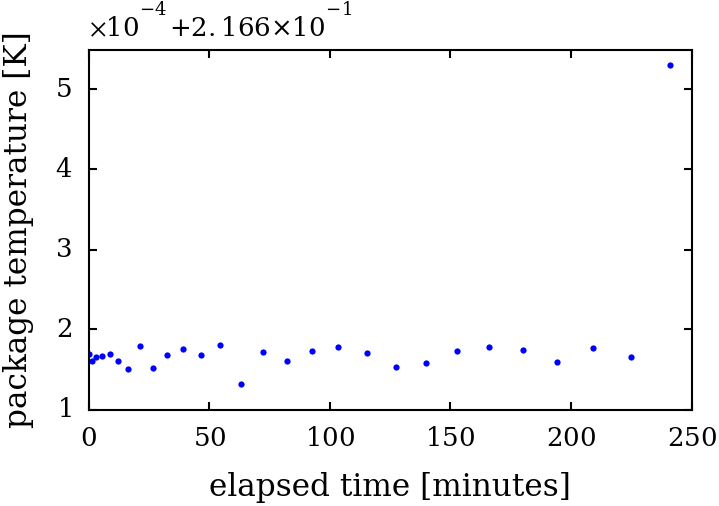

In [13]:
fig, ax = plt.subplots()
ax.plot([(sss.stream.epoch - all_sss[0].stream.epoch) / 60 for sss in all_sss],
        [sss.state.temperature.primary_package for sss in all_sss],
        '.b')
ax.set_xlabel('elapsed time [minutes]')
ax.set_ylabel('package temperature [K]');

In [14]:
from collections import namedtuple
ResonatorData = namedtuple('ResonatorData', field_names=['f_data', 's21_data',
                                                         'f_model', 's21_model',
                                                         'f_r', 's21_r'])

def extract(resonator, normalize, num_model_points):
    f_data = resonator.frequency.copy()
    s21_data = resonator.data.copy()
    f_model = np.linspace(f_data.min(), f_data.max(), num_model_points)
    s21_model = resonator.model.eval(params=resonator.current_params, f=f_model)
    f_r = resonator.f_0
    s21_r = resonator.model.eval(params=resonator.current_params, f=f_r)
    if normalize:
        s21_data = resonator.remove_background(frequency=f_data, s21_raw=s21_data)
        s21_model = resonator.remove_background(frequency=f_model, s21_raw=s21_model)
        s21_r = resonator.remove_background(frequency=f_r, s21_raw=s21_r)
    return ResonatorData(f_data, s21_data, f_model, s21_model, f_r, s21_r)

    
def amplitude(axis, resonator, normalize=False, num_model_points=1000, f_scale=1e-6, three_ticks=True):
    rd = extract(resonator, normalize, num_model_points)
    ax.plot(f_scale * rd.f_data, 20 * np.log10(np.abs(rd.s21_data)), '.b', markersize=2)
    ax.plot(f_scale * rd.f_model, 20 * np.log10(np.abs(rd.s21_model)), '-', color='brown')
    ax.plot(f_scale * rd.f_r, 20 * np.log10(np.abs(rd.s21_r)), '.', color='brown', markersize=3)
    if three_ticks:
        ax.set_xticks(f_scale * np.array([rd.f_data.min(), rd.f_r, rd.f_data.max()]))


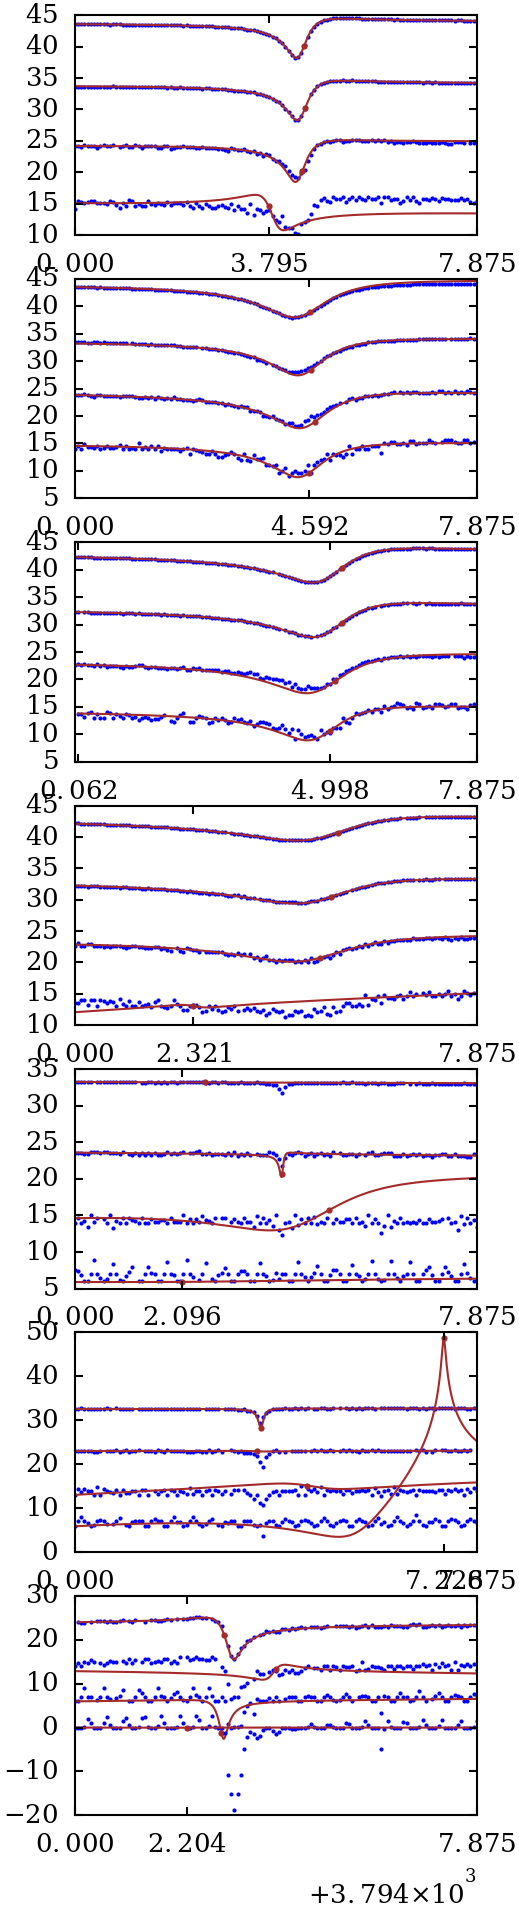

In [21]:
fig, axes = plt.subplots(num_channels, 1, figsize=(2, 10))
for channel, ax in zip(range(num_channels), axes.flatten()):
    for sss in all_sss[channel * num_attenuations:(channel+1) * num_attenuations]:
        amplitude(ax, sss.sweep.resonator)

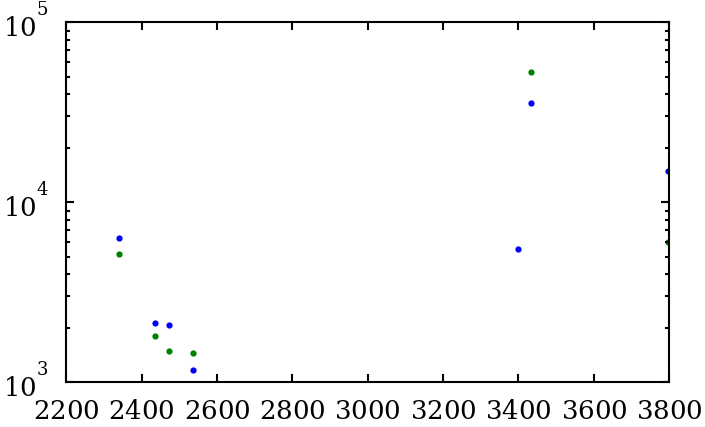

In [26]:
fig, ax = plt.subplots()
for channel in range(num_channels):
    sss = all_sss[num_attenuations * channel]
    ax.plot(1e-6 * sss.sweep.resonator.f_0,
            sss.sweep.resonator.Q_i,
            '.b')
    ax.plot(1e-6 * sss.sweep.resonator.f_0,
            sss.sweep.resonator.Q_e_real,
            '.g')

ax.set_yscale('log')
ax.set_ylim(1e3, 1e5);

Channel 3 failed.
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked values than samples to draw from!
more masked valu

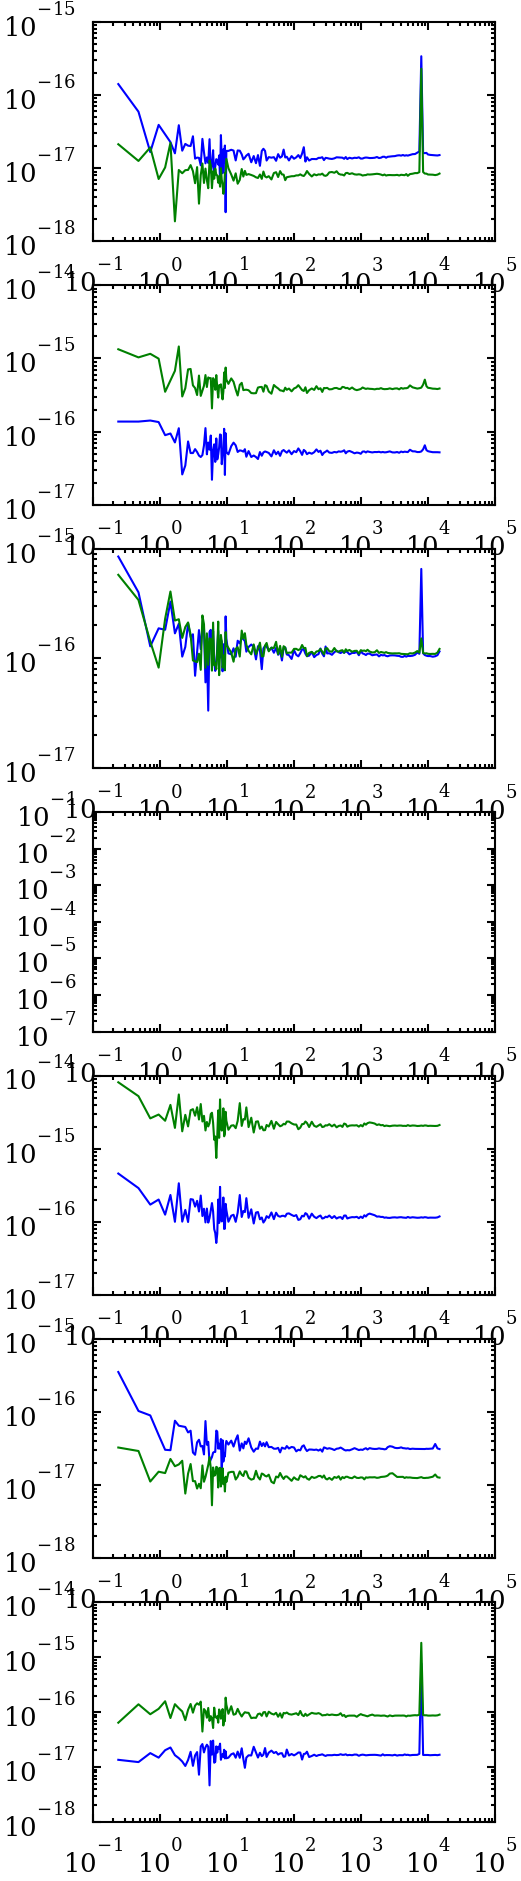

In [28]:
fig, axes = plt.subplots(num_channels, 1, figsize=(2, 10))
for channel, ax in enumerate(axes.flatten()):
    sss = all_sss[channel * num_attenuations]
    try:
        ax.loglog(sss.S_frequency, sss.S_xx, '-b')
        ax.loglog(sss.S_frequency, sss.S_yy, '-g')
    except:
        print("Channel {} failed.".format(channel))